<a href="https://colab.research.google.com/github/jangalasriramd7/MachineLearning/blob/main/CIFAR10_Dataset_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [26]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [27]:
X_test.shape

(10000, 32, 32, 3)

In [28]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [29]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [30]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [31]:
classes[9]

'truck'

In [32]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X_train[index])
  plt.xlabel(classes[y[index]])

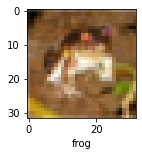

In [33]:
plot_sample(X_train, y_train, 0)

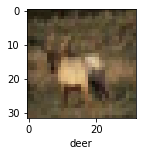

In [34]:
plot_sample(X_train, y_train, 3)

In [35]:
X_train = X_train/255
X_test = X_test/255

In [36]:
ann = models.Sequential([
                         layers.Flatten(input_shape=(32,32,3)),
                         layers.Dense(3000, activation='relu'),
                         layers.Dense(1000, activation='relu'),
                         layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 107s 68ms/step - loss: 1.8583 - accuracy: 0.3317
Epoch 2/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.6580 - accuracy: 0.4120
Epoch 3/5
1563/1563 [==============================] - 109s 70ms/step - loss: 1.5695 - accuracy: 0.4453
Epoch 4/5
1563/1563 [==============================] - 107s 68ms/step - loss: 1.5086 - accuracy: 0.4691
Epoch 5/5
1563/1563 [==============================] - 109s 70ms/step - loss: 1.4571 - accuracy: 0.4854


In [37]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 9s 28ms/step - loss: 1.5432 - accuracy: 0.4548


[1.5432401895523071, 0.454800009727478]

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.44      0.52      1000
           1       0.58      0.63      0.61      1000
           2       0.37      0.23      0.28      1000
           3       0.45      0.14      0.21      1000
           4       0.27      0.71      0.39      1000
           5       0.56      0.18      0.27      1000
           6       0.42      0.65      0.51      1000
           7       0.69      0.34      0.46      1000
           8       0.51      0.72      0.60      1000
           9       0.57      0.51      0.54      1000

    accuracy                           0.45     10000
   macro avg       0.51      0.45      0.44     10000
weighted avg       0.51      0.45      0.44     10000



In [47]:
cnn = models.Sequential([
                         
                         #cnn
                         layers.Conv2D(filters=32, kernel_size = (3,3),  activation='relu', input_shape=(32, 32, 3)),
                         layers.MaxPooling2D((2,2)),
                         #cnn
                         layers.Conv2D(filters=64, kernel_size = (3,3),  activation='relu'),
                         layers.MaxPooling2D((2,2)),
                         #dense
                         layers.Flatten(),
                         layers.Dense(64, activation='relu'),
                         layers.Dense(10, activation='softmax')
])

In [48]:
cnn.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [49]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4563 - accuracy: 0.4786
Epoch 2/10
1563/1563 [==============================] - 60s 39ms/step - loss: 1.1057 - accuracy: 0.6128
Epoch 3/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.9742 - accuracy: 0.6597
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8875 - accuracy: 0.6920
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8180 - accuracy: 0.7142
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7594 - accuracy: 0.7355
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7110 - accuracy: 0.7527
Epoch 8/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6608 - accuracy: 0.7706
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6214 - accuracy: 0.7826
Epoch 10/10
1563/1563 [==============================] - 59s 38m

In [50]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9444 - accuracy: 0.6951


[0.944352924823761, 0.6951000094413757]

In [51]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

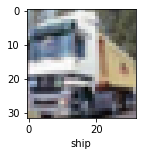

In [55]:
plot_sample(X_test, y_test, 1)

In [56]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[4.44330228e-03, 1.19038275e-04, 4.56011476e-04, 5.48287034e-01,
        4.91275059e-05, 4.08302277e-01, 1.92883667e-02, 5.38964057e-04,
        1.81658212e-02, 3.50096583e-04],
       [7.00158766e-04, 7.59636238e-03, 2.33117532e-07, 1.44221604e-08,
        4.40889192e-09, 1.06527842e-09, 1.52093060e-10, 1.13605847e-10,
        9.91696358e-01, 6.90218167e-06],
       [3.54017839e-02, 3.71610792e-03, 3.56989680e-04, 1.95600034e-04,
        5.57755702e-05, 3.69689631e-04, 1.36196622e-05, 6.78544966e-05,
        9.59230840e-01, 5.91732736e-04],
       [9.79948401e-01, 3.71763110e-03, 7.08937878e-03, 4.15999297e-04,
        3.83329520e-04, 8.98414437e-05, 1.83664179e-05, 7.87038516e-06,
        8.29345547e-03, 3.59064470e-05],
       [7.38596498e-07, 2.65720951e-06, 2.40821112e-03, 3.20685026e-03,
        1.48117617e-01, 5.39456378e-04, 8.45722079e-01, 5.69153258e-07,
        4.34718487e-07, 1.41101270e-06]], dtype=float32)

In [60]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

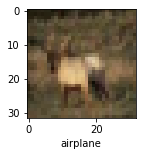

In [65]:
plot_sample(X_test, y_test, 3)

In [64]:
classes[y_classes[0]]

'cat'

In [66]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.75      0.71      1000
           1       0.84      0.79      0.82      1000
           2       0.59      0.61      0.60      1000
           3       0.51      0.51      0.51      1000
           4       0.61      0.70      0.65      1000
           5       0.62      0.54      0.58      1000
           6       0.79      0.74      0.77      1000
           7       0.76      0.72      0.74      1000
           8       0.75      0.86      0.80      1000
           9       0.82      0.74      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000

